
# Facebook Data Analysis


## Getting data from Steam page with Graph Facebook API
### https://developers.facebook.com/tools/explorer/1924568964478277?method=GET&path=steam%2Fposts%3Ffields%3Dmessage%2Ccomments.limit(0).summary(true)%2Clikes.limit(0).summary(true)%2Ccreated_time&version=v2.9

In [30]:
#Import Libraries
import requests
import pprint
import pickle
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import sklearn
'''
import nltk
nltk.download()
'''

'\nimport nltk\nnltk.download()\n'

In [2]:
# Request Graph facebook API

token = "EAAbWYqF5NUUBADag72tzmtmOLoShiIaDNx6EILglgtsQjb3LgZChp3cLZB9kSkwbZAcqGHQyyxZBxSwqxVBX5goZAAuKFc1jgdUCxZCEqhgyDEhFTJqacECV0oVjUoxNlhEiZCXz0XBzisPoAriZANk5we81aRZAonwdcExNwBoHZAZCtiaegoZAqyxtiLM51zx2ZB0gZD"

def req_facebook(req) :
    r = requests.get("https://graph.facebook.com/v2.9/" + req , {'access_token': token })
    print(r)
    return r
req = "steam/posts?fields=message%2Ccomments.limit(0).summary(true)%2Clikes.limit(0).summary(true)%2Ccreated_time"

result = req_facebook(req).json()


<Response [200]>


In [3]:
# Loop throw the results and save the next url request to data
data = [] # new list
i = 0
while True :
    try :
        time.sleep(random.randint(1,2)) # wait between 1 and 2 seconds to make the next request
        data.extend(result['data']) #put the content of the list data into another list
        r = requests.get(result['paging']['next']) # next page
        result = r.json()
        i+=1
        '''
        if i> 3 : # just the 3 first pages for debugging
            break;
        '''
    except: # if there's no more results 
        print("End")
        break
        

End


In [4]:
# Saving data into a pickle file and upload it avoiding to make the requests every time
pickle.dump(data,open("stream_data_fb.pkl","wb"))


## Load data

In [2]:
loaded_data = pickle.load(file=open("stream_data_fb.pkl","rb"))

## Setting up & Cleaning the data

In [3]:
# Pretty print of the data
#pprint.pprint(loaded_data)
loaded_data[0]

{'comments': {'data': [],
  'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 7}},
 'created_time': '2017-06-15T01:15:43+0000',
 'id': '67919847338_10154736895752339',
 'likes': {'data': [],
  'summary': {'can_like': True, 'has_liked': False, 'total_count': 137}},
 'message': 'Oats Studios - Volume 1 is Now Available on Steam!\n\nOats Studios makes experimental short films â€� a testing ground for ideas and creativity. Leading to full scale feature films based on ideas created here. If you like what you see, get behind us. Check out our Oats Studios - Volume 1 Assets page to purchase additional content.'}

In [4]:
# From nested data to a columns based data
df = pd.io.json.json_normalize(data=loaded_data)

In [5]:
df.head()

,comments.data,comments.summary.can_comment,comments.summary.order,comments.summary.total_count,created_time,id,likes.data,likes.summary.can_like,likes.summary.has_liked,likes.summary.total_count,message
0,[],True,ranked,7,2017-06-15T01:15:43+0000,67919847338_10154736895752339,[],True,False,137,Oats Studios - Volume 1 is Now Available on St...
1,[],True,ranked,7,2017-06-15T01:15:42+0000,67919847338_10154736895697339,[],True,False,66,Symphonic Rain is Now Available on Steam and i...
2,[],True,ranked,59,2017-06-14T17:41:59+0000,67919847338_10154735930927339,[],True,False,224,Today's Deal: Save 60% on XCOMÂ® 2 !*\n\nLook ...
3,[],True,ranked,102,2017-06-13T17:10:04+0000,67919847338_10154732666857339,[],True,False,530,Save 60% on Dying Light: The Following - Enhan...
4,[],True,ranked,17,2017-06-13T17:10:03+0000,67919847338_10154732666797339,[],True,False,164,Today's Deal: Save 50% on Tyranny !*\n\nLook f...


In [6]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['comments.data', 'comments.summary.can_comment',
       'comments.summary.order', 'comments.summary.total_count',
       'created_time', 'id', 'likes.data', 'likes.summary.can_like',
       'likes.summary.has_liked', 'likes.summary.total_count', 'message'],
      dtype='object')


## Drop useless columns

In [7]:
df.drop(['comments.data','comments.summary.can_comment','comments.summary.order','likes.data','likes.summary.can_like','likes.summary.has_liked'],axis=1,inplace=True)


In [8]:
df.head()

,comments.summary.total_count,created_time,id,likes.summary.total_count,message
0,7,2017-06-15T01:15:43+0000,67919847338_10154736895752339,137,Oats Studios - Volume 1 is Now Available on St...
1,7,2017-06-15T01:15:42+0000,67919847338_10154736895697339,66,Symphonic Rain is Now Available on Steam and i...
2,59,2017-06-14T17:41:59+0000,67919847338_10154735930927339,224,Today's Deal: Save 60% on XCOMÂ® 2 !*\n\nLook ...
3,102,2017-06-13T17:10:04+0000,67919847338_10154732666857339,530,Save 60% on Dying Light: The Following - Enhan...
4,17,2017-06-13T17:10:03+0000,67919847338_10154732666797339,164,Today's Deal: Save 50% on Tyranny !*\n\nLook f...


In [9]:
df.rename(columns = {'comments.summary.total_count':'total_comments'},inplace=True)
df.rename(columns = {'likes.summary.total_count':'total_likes'},inplace=True)
#df.columns = ['total_comments','id','total_likes','message']

## Cleaning null values / Checking types

In [10]:
# Fill Nan values as empty
df.fillna("",inplace=True)

In [11]:
# Check columns types
df.dtypes

total_comments     int64
created_time      object
id                object
total_likes        int64
message           object
dtype: object

In [12]:
# convert date timeto datatime
df['created_time'] = pd.to_datetime(df['created_time'])
df.iloc[0]

total_comments                                                    7
created_time                                    2017-06-15 01:15:43
id                                    67919847338_10154736895752339
total_likes                                                     137
message           Oats Studios - Volume 1 is Now Available on St...
Name: 0, dtype: object

## Data Analysis

In [13]:
# Statistics
df.describe()

,total_comments,total_likes
count,6394.000000,6394.000000
mean,58.522208,173.412261
std,143.631018,477.531217
min,0.000000,0.000000
25%,17.000000,55.000000
50%,32.000000,88.000000
75%,61.000000,161.000000
max,6243.000000,20351.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 5 columns):
total_comments    6394 non-null int64
created_time      6394 non-null datetime64[ns]
id                6394 non-null object
total_likes       6394 non-null int64
message           6394 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 249.8+ KB


## Data Visualization

In [15]:
copy_df = df.copy()

In [16]:
copy_df.set_index('created_time',inplace=True)

In [17]:
#Downsample data to group by total of comments and likes per day
day_downsample = copy_df.resample('M').sum()

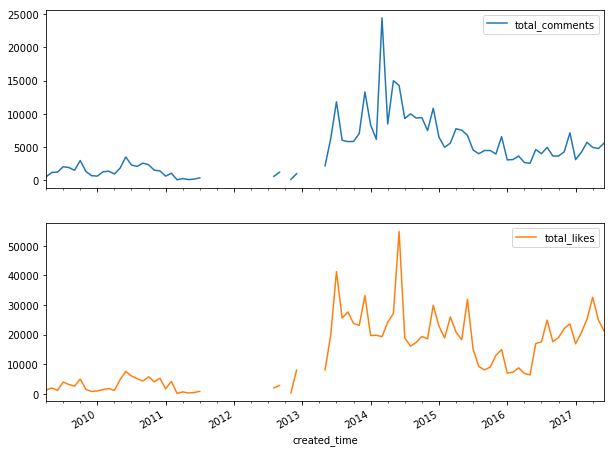

In [18]:
day_downsample.plot(subplots=True,figsize=(10,8))
plt.show()

In [19]:
# Check day of max likes
day_downsample[day_downsample['total_likes'] == np.max(day_downsample['total_likes'])]

,total_comments,total_likes
created_time,,
2014-06-30,14245.0,54767.0


## Most comented post

In [20]:
copy_df = copy_df.reset_index()
top_comments = copy_df.sort_values('total_comments',ascending=False).head(10)['id']
for i,com_id in top_comments.iteritems() :
    print("https://www.facebook.com/{}".format(com_id))



https://www.facebook.com/67919847338_10151870697512339
https://www.facebook.com/67919847338_10154718374237339
https://www.facebook.com/67919847338_10201408757494113
https://www.facebook.com/67919847338_10152109331327339
https://www.facebook.com/67919847338_10154248068522339
https://www.facebook.com/67919847338_10152188716552339
https://www.facebook.com/67919847338_10152385691332339
https://www.facebook.com/67919847338_10201460830035894
https://www.facebook.com/67919847338_10152174809517339
https://www.facebook.com/67919847338_10153761798622339


In [21]:
top_likes = copy_df.sort_values('total_comments',ascending=False).head(10)['id']
for i,like in top_likes.iteritems() :
    print("https://www.facebook.com/{}".format(like))
    

https://www.facebook.com/67919847338_10151870697512339
https://www.facebook.com/67919847338_10154718374237339
https://www.facebook.com/67919847338_10201408757494113
https://www.facebook.com/67919847338_10152109331327339
https://www.facebook.com/67919847338_10154248068522339
https://www.facebook.com/67919847338_10152188716552339
https://www.facebook.com/67919847338_10152385691332339
https://www.facebook.com/67919847338_10201460830035894
https://www.facebook.com/67919847338_10152174809517339
https://www.facebook.com/67919847338_10153761798622339


In [22]:
assert list(top_likes)[0] == list(top_comments)[0] ## Check if the most commented post it is actually the one with more likes

## Most common words

In [23]:
stop_words = set(stopwords.words('english'))
def word_count(df,column) :
    translator = str.maketrans('','', string.punctuation)
    words = {} # dictionary of words count
    for message in df[column] :
        split_message = message.strip().split(' ') 
        for word in split_message :
            word = word.strip()
            word = word.lower()
            word = word.translate(translator)
            if word not in stop_words :
                if len(word) > 3 :
                    if word in words :
                        words[word] +=1
                    else :
                        words[word] = 1
                    
    return words

In [24]:
word_count = word_count(df,'message')

In [25]:
words_df = pd.DataFrame(list(word_count.items()),columns=['words','count'])

In [26]:
words_df.sort_values('count',ascending=False,inplace=True)

In [27]:
print(words_df['words'])

29                     steam
3                  available
56                      time
55                   pacific
54                      10am
52                      ends
59                      save
127                     game
62                     deals
58                      deal
23                      page
57                    todays
64                    follow
63                     front
67                   instant
68             notifications
65                   twitter
66                  facebook
69                  wherever
70              are\n\noffer
310                    world
61                  \n\nlook
88                     games
226                     play
151                   monday
76                     weeks
26                   content
258                     free
1176                    pack
1039                    sale
                ...         
13286      decisions\n\nwill
13287               strange™
13288          steam\n\nlife
13289    steam

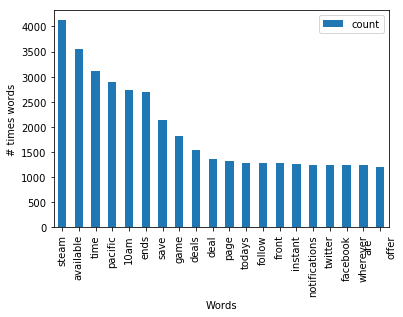

In [28]:
words_df[words_df['count'] > 1000].plot(kind='bar',x='words')
plt.xlabel('Words')
plt.ylabel('# times words')
plt.show()